In [1]:
from map_tool_box.modules import Data_Transformation
from map_tool_box.modules import Data_Structure
from map_tool_box.modules import Data_Map
from map_tool_box.modules import Astar
from map_tool_box.modules import Utils
from IPython.display import HTML
import matplotlib.pyplot as plt

# make data map object and view map

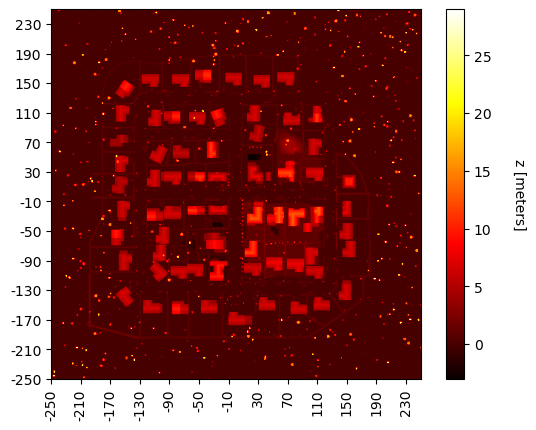

In [2]:
# use data tool and set map to fetch data from -- we will use the AirSimNH map
    # memory_saver=True only caches recent data when loading from file -- it is slower but takes significantly less RAM
map_name = 'AirSimNH'
data_map = Data_Map.DataMapRoof(map_name, memory_saver=True)

# plot data_map grid
fig, ax = plt.subplots()
data_map.plot_map(fig, ax, show_z=True)
plt.show()

# get and show data at a specific point

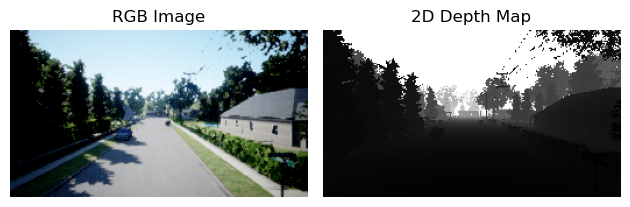

In [3]:
# we will fetch one data point from the given coordinates
x, y, z, direction = 0, 0, 4, 0
point = Data_Structure.Point(x, y, z, direction)

# set sensor names from precollected data using tool
rgb_sensor_name = 'SceneV1'
depth_sensor_name = 'DepthV1'

# fetch data
rgb_image = data_map.get_data_point(point, rgb_sensor_name)
depth_map = data_map.get_data_point(point, depth_sensor_name)

# visualize data
fig, axs = plt.subplots(ncols=2)

ax = axs[0]
ax.imshow(Data_Transformation.channel_first_to_last(rgb_image))
ax.set_title('RGB Image')
ax.axis('off')

ax = axs[1]
ax.set_title('2D Depth Map')
ax.imshow(depth_map[0], cmap='grey')
ax.axis('off')

fig.tight_layout()
plt.show()

# fetch data at a specific set of points

In [4]:
# input points desired to grab = [ [x_1, y_1, z_1, direction_1], ..., [x_N, y_N, z_N, direction_N]] 
sensor_names = [rgb_sensor_name,depth_sensor_name]
poses = [[0,0,4,0], [0,4,4,0], [0,8,4,0], [0,8,4,1]] 
points = [Data_Structure.Point(*pose) for pose in poses] # cast to proper data struct

# returns fetched_data which is a dictionary of numpy arrays organized as:
    # sensor_name: np.array([ observation_at_point_1, ..., observation_at_point_N])
fetched_data = data_map.fetch_data_at_points(sensor_names, points)
for sensor_name in fetched_data:
    print(sensor_name, 'collected data of shape', fetched_data[sensor_name].shape)

SceneV1 collected data of shape (4, 3, 144, 256)
DepthV1 collected data of shape (4, 1, 144, 256)


# visualize animation of data

In [5]:
# make animation from fetched data at given points
animation = data_map.make_animation(fetched_data, sensor_names, points, show_fov=True)

# show animation in notebook
display(HTML(animation.to_jshtml()))

# save as gif
#animation.save('data_animation.gif', writer='pillow', fps=2)

# fetch data along a path defined by start and target position

In [6]:
sensor_names = [rgb_sensor_name, depth_sensor_name]

# get path
start_point = Data_Structure.Point(0, 0, 4, 0)
target_point = Data_Structure.Point(120, 180, 4)
path, valid = Astar.get_quick_path(start_point, target_point, map_name)

if valid:
    # returns fetched_data which is a dictionary of numpy arrays organized as:
        # sensor_name: np.array([ observation_at_point_1, ..., observation_at_point_N])
    fetched_data = data_map.fetch_data_at_points(sensor_names, path)
    for sensor_name in fetched_data:
        print(sensor_name, 'collected data of shape', fetched_data[sensor_name].shape)
        
    # make animation from fetched data at given points
    animation = data_map.make_animation(fetched_data, sensor_names, points=path, show_path=True)
    
    # show animation is notebook
    display(HTML(animation.to_jshtml()))

# save as gif
#animation.save('path_animation.gif', writer='pillow', fps=2)

path succesfully found
SceneV1 collected data of shape (15, 3, 144, 256)
DepthV1 collected data of shape (15, 1, 144, 256)
